<a href="https://colab.research.google.com/github/omfuke/project2/blob/master/CNNmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

In [0]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Some images of datasets.


label name :  9


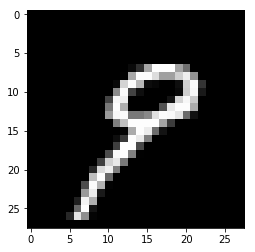

label name :  5


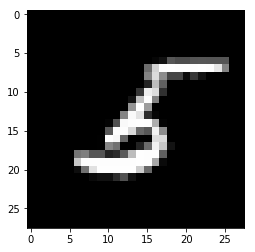

label name :  7


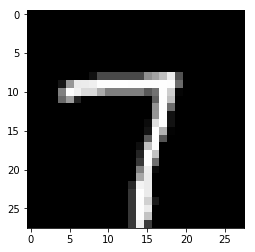

label name :  1


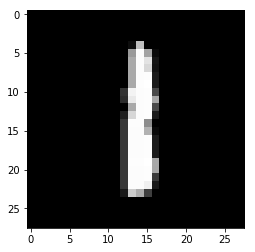

label name :  5


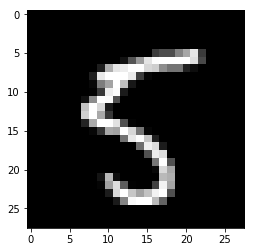

In [20]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(5):
  index=np.random.randint(0,len(x_train))
  plt.imshow(x_train[index],cmap=plt.get_cmap('gray'))
  print('label name : ',y_train[index])
  plt.show()

## Prepare Data for Training bold text

In [22]:
img_rows = x_train[0].shape[1]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

print(x_train[0])




[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

## One hot Encode Labels

In [23]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[0])
print(y_train.shape)
num_classes = y_train.shape[1]
print('num of classes:',num_classes)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
num of classes: 10


## Create model


1.   We're constructing a simple but effective CNN that uses 32 filters of size 3x3
2.   We've added a 2nd CONV layer of 64 filters of the same size 3x2
3.   We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
4.   We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
5.  How we apply a dropout where P is set to 0.5 
6.   Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units





In [24]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation ='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())






Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Training Model

In [26]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.5667 - acc: 0.8237 - val_loss: 0.1931 - val_acc: 0.9425
Epoch 2/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.2971 - acc: 0.9100 - val_loss: 0.1485 - val_acc: 0.9570
Epoch 3/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.2375 - acc: 0.9294 - val_loss: 0.1170 - val_acc: 0.9639
Epoch 4/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.1908 - acc: 0.9436 - val_loss: 0.0886 - val_acc: 0.9726
Epoch 5/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.1576 - acc: 0.9531 - val_loss: 0.0773 - val_acc: 0.9753
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1357 - acc: 0.9594 - val_loss: 0.0677 - val_acc: 0.9788
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1186 - acc: 0.9641 - val_loss: 0.

## Ploting our Loss and Accuracy Charts

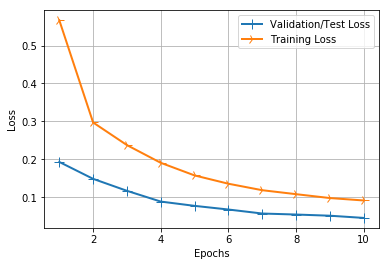

In [27]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

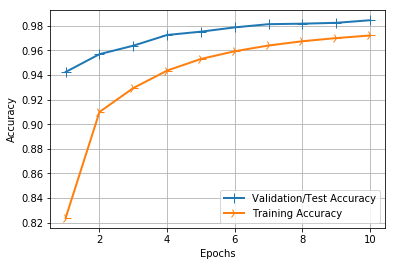

In [28]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()